In [1]:
from tqdm import tqdm
from glob import glob, iglob
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
from fact import plotting
import numpy as np
np.random.seed(2)

In [2]:
pixel = np.random.randint(0, 1440, 7)
pixel

array([1192,  527,  493,  299,  466, 1099,  360])

In [3]:
paths = glob('data/*')
file_ids = np.random.choice(len(paths), 4, replace=False)
paths = [paths[i] for i in file_ids]
paths

['data/20160602_007.drs.fits.gz',
 'data/20130711_074.drs.fits.gz',
 'data/20121204_017.drs.fits.gz',
 'data/20130712_007.drs.fits.gz']

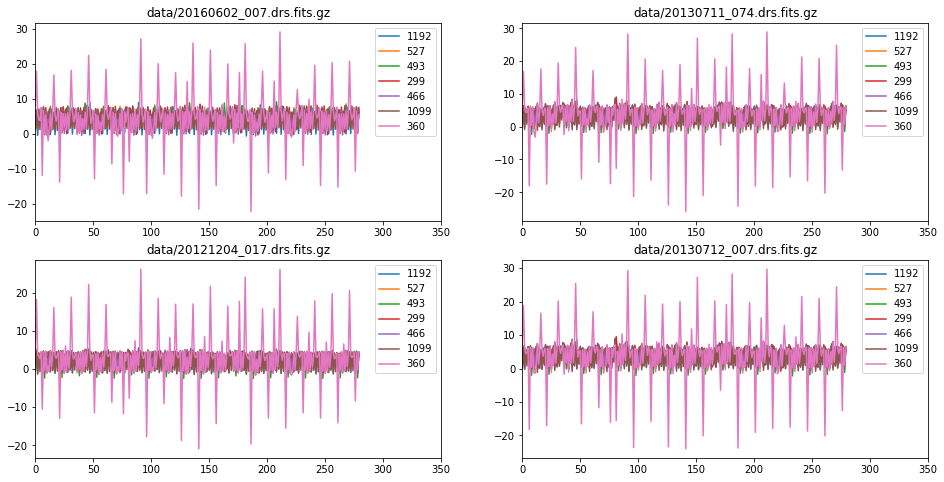

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
for i,p in enumerate(paths):
    ax = axes.flatten()[i]
    f = fits.open(p)
    c = f[1].data['TriggerOffsetMean'].reshape(-1, 1440)[20:, :]
    for i in pixel:
        ax.plot(c[:, i], label=str(i))
    ax.set_xlim(0, 350)
    ax.set_title(p)
    ax.legend()
None

100%|██████████| 167/167 [01:11<00:00,  3.00it/s]


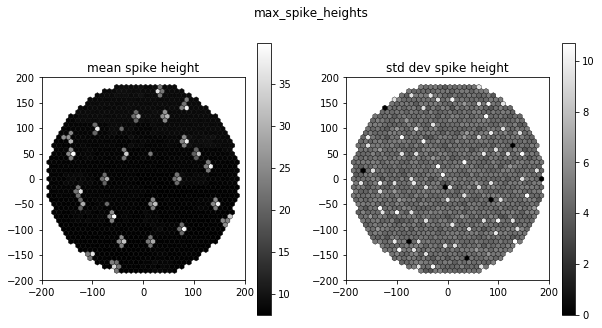

In [5]:
paths = glob('data/*')
max_spike_heights = []
for p in tqdm(paths):
    f = fits.open(p)
    c = f[1].data['TriggerOffsetMean'].reshape(-1, 1440)[20:, :]
    max_spike_height = np.abs(c).max(axis=0)
    max_spike_heights.append(max_spike_height)
max_spike_heights = np.array(max_spike_heights)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

img = plotting.camera(
    max_spike_heights.mean(axis=0),
    ax=axes[0]
)
fig.colorbar(img, ax=axes[0])
axes[0].set_title("mean spike height")

img = plotting.camera(
    max_spike_heights.std(axis=1),
    ax=axes[1]
)
fig.colorbar(img, ax=axes[1])
axes[1].set_title("std dev spike height")

plt.suptitle("max_spike_heights")
None

In [6]:
ls data

20111122_015.drs.fits.gz  20130803_042.drs.fits.gz  20151120_134.drs.fits.gz
20111202_024.drs.fits.gz  20130811_069.drs.fits.gz  20151209_069.drs.fits.gz
20111212_043.drs.fits.gz  20130811_099.drs.fits.gz  20160106_116.drs.fits.gz
20120117_028.drs.fits.gz  20130812_007.drs.fits.gz  20160115_029.drs.fits.gz
20120121_092.drs.fits.gz  20130812_098.drs.fits.gz  20160118_128.drs.fits.gz
20120123_100.drs.fits.gz  20130816_041.drs.fits.gz  20160120_116.drs.fits.gz
20120202_027.drs.fits.gz  20130818_114.drs.fits.gz  20160209_190.drs.fits.gz
20120203_070.drs.fits.gz  20130901_007.drs.fits.gz  20160211_007.drs.fits.gz
20120229_152.drs.fits.gz  20130901_020.drs.fits.gz  20160302_161.drs.fits.gz
20120301_037.drs.fits.gz  20130912_081.drs.fits.gz  20160311_132.drs.fits.gz
20120322_043.drs.fits.gz  20130930_007.drs.fits.gz  20160328_144.drs.fits.gz
20120328_046.drs.fits.gz  20130930_093.drs.fits.gz  20160403_117.drs.fits.gz
20120415_077.drs.fits.gz  20130930_242.drs.fits.gz  20160406_117.drs.fits.gz